In [1]:
import pandas as pd

In [2]:
merged_data = pd.read_csv('gait_merge_new.csv', low_memory=False)


In [3]:
merged_data['GRF_metadata.CLASS_LABEL'] = merged_data['GRF_metadata.CLASS_LABEL'].replace({'C': 1, 'K': 1, 'H': 1, 'A': 1})

merged_data['GRF_metadata.CLASS_LABEL'] = merged_data['GRF_metadata.CLASS_LABEL'].replace({'HC': 0})

In [4]:
merged_data.isnull().sum()

SUBJECT_ID                     0
SESSION_ID                     0
TRIAL_ID                       0
F_V_PRO_1                      0
F_V_PRO_2                      0
                              ..
GRF_metadata.READMISSION       0
GRF_metadata.SESSION_TYPE      0
GRF_metadata.TRAIN             0
GRF_metadata.TRAIN_BALANCED    0
GRF_metadata.TEST              0
Length: 116, dtype: int64

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping


In [6]:
from sklearn.model_selection import train_test_split
test_size_ratio = 0.3
accuracies = []
X = merged_data.drop(columns=['GRF_metadata.CLASS_LABEL', 'GRF_metadata.CLASS_LABEL_DETAILED', 'SUBJECT_ID', 'SESSION_ID'])  # Features
y = merged_data['GRF_metadata.CLASS_LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_ratio, random_state=42)


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score


X_train_reshaped = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1, 1)

In [8]:
model = Sequential([
    Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=X_train_reshaped.shape[1:], padding='same'),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with a different learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for fewer epochs
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)
print("Test Accuracy:", test_accuracy)


C:\Users\Anushka\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7825 - loss: 3.1632 - val_accuracy: 0.8957 - val_loss: 0.2949
Epoch 2/10
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8976 - loss: 0.2775 - val_accuracy: 0.8968 - val_loss: 0.2450
Epoch 3/10
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9071 - loss: 0.2330 - val_accuracy: 0.9114 - val_loss: 0.2110
Epoch 4/10
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9151 - loss: 0.2088 - val_accuracy: 0.9149 - val_loss: 0.1929
Epoch 5/10
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9169 - loss: 0.1939 - val_accuracy: 0.9249 - val_loss: 0.1849
Epoch 6/10
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9221 - loss: 0.1813 - val_accuracy: 0.9246 - val_loss: 0.1695
Epoch 7/10
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9237 - loss: 0.1736 - val_accuracy: 0.9146 - val_loss: 0.1846
Epoch 8/10
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9268 - loss: 0.1647 

Fold 1/5:


C:\Users\Anushka\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Fold 2/5:


C:\Users\Anushka\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Fold 3/5:


C:\Users\Anushka\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Fold 4/5:


C:\Users\Anushka\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Fold 5/5:


C:\Users\Anushka\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


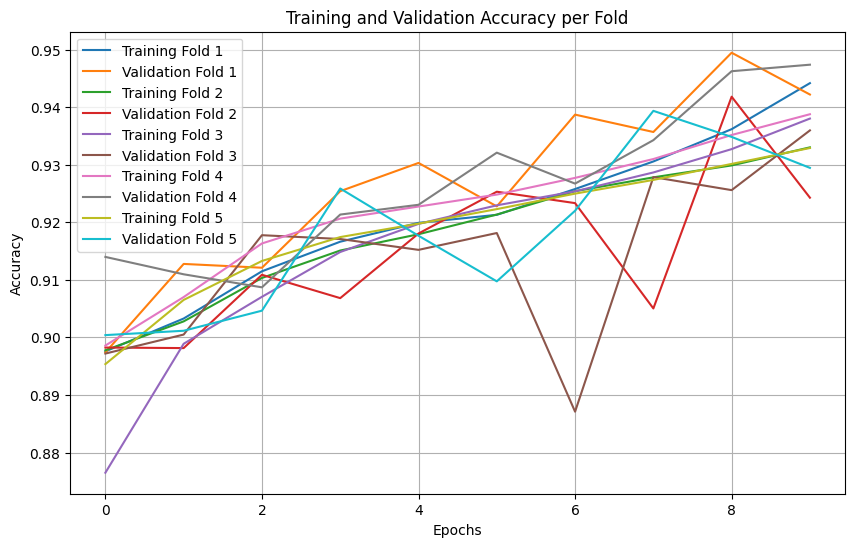

710/710 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9270 - loss: 0.1508
Test Accuracy: 0.9275968074798584


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import accuracy_score

# Reset index of y_train
y_train.reset_index(drop=True, inplace=True)

# Define the number of folds
num_folds = 5

# Initialize StratifiedKFold cross-validator
skf = StratifiedKFold(n_splits=num_folds, shuffle=True)

# Lists to store training and validation accuracy for each fold
train_acc_per_fold = []
val_acc_per_fold = []

# Loop over each fold
for fold, (train_index, val_index) in enumerate(skf.split(X_train_reshaped, y_train)):
    print(f"Fold {fold+1}/{num_folds}:")
    # Split data into training and validation sets
    X_train_fold, X_val_fold = X_train_reshaped[train_index], X_train_reshaped[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Define and compile your model
    model = Sequential([
        Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=X_train_reshaped.shape[1:], padding='same'),
        MaxPooling2D(pool_size=(2, 2), padding='same'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(X_val_fold, y_val_fold), verbose=0)
    
    # Record training and validation accuracy
    train_acc_per_fold.append(history.history['accuracy'])
    val_acc_per_fold.append(history.history['val_accuracy'])

# Plot training and validation accuracy for each fold
plt.figure(figsize=(10, 6))
for fold in range(num_folds):
    plt.plot(train_acc_per_fold[fold], label=f'Training Fold {fold+1}')
    plt.plot(val_acc_per_fold[fold], label=f'Validation Fold {fold+1}')

plt.title('Training and Validation Accuracy per Fold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)
print("Test Accuracy:", test_accuracy)


710/710 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


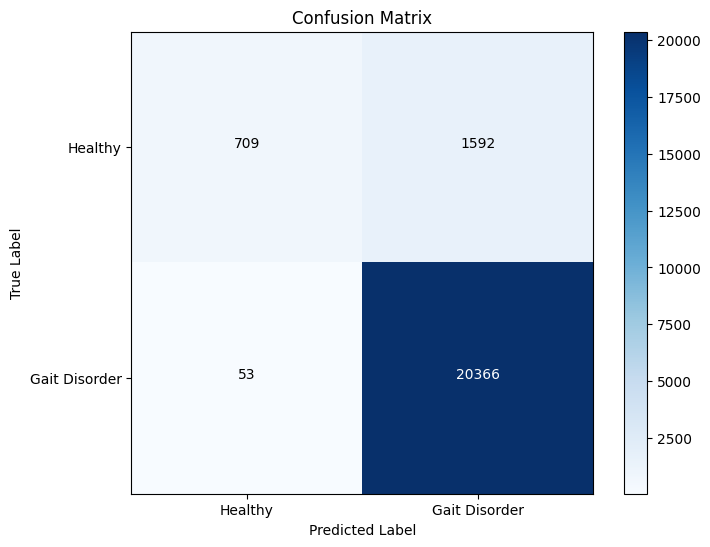

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_pred_binary and y_test are your predicted and true labels respectively
y_pred = model.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)

# Generate confusion matrix
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Healthy', 'Gait Disorder'])
plt.yticks([0, 1], ['Healthy', 'Gait Disorder'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')
plt.show()


In [11]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 112, 1, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 56, 1, 16)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 896)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │          57,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 172,901 (675.40 KB)

 Trainable params: 57,633 (225.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 115,268 (450.27 KB)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create KNN classifier with a higher value of n_neighbors
knn_classifier_complex = KNeighborsClassifier(n_neighbors=100)

# Train the classifier
knn_classifier_complex.fit(X_train, y_train)

# Make predictions on the test set
y_pred_complex = knn_classifier_complex.predict(X_test)

# Calculate accuracy
accuracy_complex = accuracy_score(y_test, y_pred_complex)
print("Accuracy (Complex KNN):", accuracy_complex)

Accuracy (Complex KNN): 0.9026805757295656


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM model with different parameters
svm_model = SVC(C=0.1, kernel='sigmoid')  # Use a sigmoid kernel
# Use cross-validation to evaluate the model
cv_scores_svm = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)

# Print the mean accuracy and standard deviation
print("Mean Accuracy with SVM (with changes):", np.mean(cv_scores_svm))
print("Standard Deviation:", np.std(cv_scores_svm))
